# Lending Club Case Study


## Objective

- To develop a basic understanding of risk analytics in banking and financial services.
- To understand the driving factors/variables behind a loan default.
- Improve portfolio and risk assessment tools, identification of the risky loan applicants, will help in reducing such loans, thereby cutting down the amount of credit loss.




## Approach taken to solve the given problem statement

###  1. Data Sourcing and Data Cleaning.

The code written for the purpose of Data Sourcing and Data Cleaning is provided below:

In [1]:
#importing libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Load the data set.
df=pd.read_csv('loan.csv',low_memory=False)

In [3]:
#Display the top 10 rows in the dataframe. This is done to verify the how the captured looks like.
df.head(10)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
5,1075269,1311441,5000,5000,5000.0,36 months,7.90%,156.46,A,A4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
6,1069639,1304742,7000,7000,7000.0,60 months,15.96%,170.08,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
7,1072053,1288686,3000,3000,3000.0,36 months,18.64%,109.43,E,E1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
8,1071795,1306957,5600,5600,5600.0,60 months,21.28%,152.39,F,F2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
9,1071570,1306721,5375,5375,5350.0,60 months,12.69%,121.45,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [4]:
#Displaying the list of columns in the given data. These columns will be used for uni/bi/multi variate analysis.
df.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       ...
       'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 'pct_tl_nvr_dlq',
       'percent_bc_gt_75', 'pub_rec_bankruptcies', 'tax_liens',
       'tot_hi_cred_lim', 'total_bal_ex_mort', 'total_bc_limit',
       'total_il_high_credit_limit'],
      dtype='object', length=111)

In [5]:
#The shape of the dataframe is given below.
df.shape

(39717, 111)

#### Before Data cleaning is commenced, Lets us identify the mising value percentage column-wise.

In [6]:
#The missing value percentage column-wise
missing_value_df=pd.DataFrame(list(dict(df.isnull().sum() * 100 / len(df)).items()),columns=['column','missing_percentage'])
print(missing_value_df.to_markdown())

|     | column                         |   missing_percentage |
|----:|:-------------------------------|---------------------:|
|   0 | id                             |           0          |
|   1 | member_id                      |           0          |
|   2 | loan_amnt                      |           0          |
|   3 | funded_amnt                    |           0          |
|   4 | funded_amnt_inv                |           0          |
|   5 | term                           |           0          |
|   6 | int_rate                       |           0          |
|   7 | installment                    |           0          |
|   8 | grade                          |           0          |
|   9 | sub_grade                      |           0          |
|  10 | emp_title                      |           6.1913     |
|  11 | emp_length                     |           2.70665    |
|  12 | home_ownership                 |           0          |
|  13 | annual_inc                     |

#### There are several columns which has missing data in each. The missing data may affect the overall analysis.  More than 30% missing data in a column is considered as a threshold to drop the column, hence dropped.

In [7]:
#extracting columns having >30% missing values and dropping those columns
null_columns=list(missing_value_df['column'][missing_value_df['missing_percentage']>30.0])
df.drop(labels =null_columns, axis = 1, inplace = True)
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,171.62,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,119.66,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,649.91,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,357.48,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,67.79,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0


In [8]:
#Updated shape of the dataframe once all the columns with missing data above or equal to 30 percent are removed.
df.shape

(39717, 53)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 53 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          39717 non-null  int64  
 1   member_id                   39717 non-null  int64  
 2   loan_amnt                   39717 non-null  int64  
 3   funded_amnt                 39717 non-null  int64  
 4   funded_amnt_inv             39717 non-null  float64
 5   term                        39717 non-null  object 
 6   int_rate                    39717 non-null  object 
 7   installment                 39717 non-null  float64
 8   grade                       39717 non-null  object 
 9   sub_grade                   39717 non-null  object 
 10  emp_title                   37258 non-null  object 
 11  emp_length                  38642 non-null  object 
 12  home_ownership              39717 non-null  object 
 13  annual_inc                  397

In [10]:
#finding number of unique values in a specific column
df.nunique()

id                            39717
member_id                     39717
loan_amnt                       885
funded_amnt                    1041
funded_amnt_inv                8205
term                              2
int_rate                        371
installment                   15383
grade                             7
sub_grade                        35
emp_title                     28820
emp_length                       11
home_ownership                    5
annual_inc                     5318
verification_status               3
issue_d                          55
loan_status                       3
pymnt_plan                        1
url                           39717
purpose                          14
title                         19615
zip_code                        823
addr_state                       50
dti                            2868
delinq_2yrs                      11
earliest_cr_line                526
inq_last_6mths                    9
open_acc                    

### Removing columns having only one unique value. Such columns will not contribute for analysis. So removed.


In [11]:
# removing columns having only one unique value.
single_valued_columns=df.columns[df.nunique()==1]
df.drop(single_valued_columns, axis = 1, inplace = True)
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,May-16,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,Sep-13,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,May-16,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,Apr-16,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,3513.33,2475.94,1037.39,0.00,0.00,0.00,May-16,67.79,May-16,0.0


In [12]:
#Displaying the updated list of columns.
df.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'url', 'purpose', 'title', 'zip_code',
       'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d',
       'pub_rec_bankruptcies'],
      dtype='object')

In [13]:
#removing unnecessary values which are Customer behavour in nature and might not be useful for the analysis.

columns_to_remove=["id", "member_id", "url", "title", "emp_title", "zip_code", "last_credit_pull_d", "addr_state","out_prncp_inv","total_pymnt_inv","funded_amnt", "delinq_2yrs", "revol_bal", "out_prncp", "total_pymnt", "total_rec_prncp", "total_rec_int", "total_rec_late_fee", "recoveries", "collection_recovery_fee", "last_pymnt_d", "last_pymnt_amnt","pub_rec_bankruptcies"]
df.drop(columns_to_remove, axis = 1, inplace = True)

In [14]:
#Displaying updated list of columns.
df.columns

Index(['loan_amnt', 'funded_amnt_inv', 'term', 'int_rate', 'installment',
       'grade', 'sub_grade', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'purpose', 'dti',
       'earliest_cr_line', 'inq_last_6mths', 'open_acc', 'pub_rec',
       'revol_util', 'total_acc'],
      dtype='object')

In [15]:
#Displaying update shape of the dataframe
df.shape

(39717, 21)

#### Handling Missing Values in the dataset.

In [16]:
#checking for missing values
(df.isna().sum()/len(df))*100
#'emp_length' and  'revol_util' are having missing values

loan_amnt              0.000000
funded_amnt_inv        0.000000
term                   0.000000
int_rate               0.000000
installment            0.000000
grade                  0.000000
sub_grade              0.000000
emp_length             2.706650
home_ownership         0.000000
annual_inc             0.000000
verification_status    0.000000
issue_d                0.000000
loan_status            0.000000
purpose                0.000000
dti                    0.000000
earliest_cr_line       0.000000
inq_last_6mths         0.000000
open_acc               0.000000
pub_rec                0.000000
revol_util             0.125891
total_acc              0.000000
dtype: float64

In [17]:
# as "emp_length"  is a categorical variable  we can fill the misssing values with mode which is 10+ years 
df["emp_length"].value_counts()

10+ years    8879
< 1 year     4583
2 years      4388
3 years      4095
4 years      3436
5 years      3282
1 year       3240
6 years      2229
7 years      1773
8 years      1479
9 years      1258
Name: emp_length, dtype: int64

In [18]:
df["emp_length"].fillna(df["emp_length"].mode()[0], inplace = True)

In [19]:
df["revol_util"]
#"revol_util" column has continous values but it is an object column

0        83.70%
1         9.40%
2        98.50%
3           21%
4        53.90%
          ...  
39712    13.10%
39713    26.90%
39714    19.40%
39715     0.70%
39716    51.50%
Name: revol_util, Length: 39717, dtype: object

In [20]:
#dropping missing values in "revol_util"
df.dropna(axis = 0, subset = ['revol_util'] , inplace = True)


In [21]:
#Displaying the updated shape.
df.shape

(39667, 21)

In [22]:
#checking for missing values after imputing and dropping missing values
(df.isna().sum()/len(df))*100

loan_amnt              0.0
funded_amnt_inv        0.0
term                   0.0
int_rate               0.0
installment            0.0
grade                  0.0
sub_grade              0.0
emp_length             0.0
home_ownership         0.0
annual_inc             0.0
verification_status    0.0
issue_d                0.0
loan_status            0.0
purpose                0.0
dti                    0.0
earliest_cr_line       0.0
inq_last_6mths         0.0
open_acc               0.0
pub_rec                0.0
revol_util             0.0
total_acc              0.0
dtype: float64

### Standardizing the data  

The steps taken to standardize the data are
 
- Removing % symbol from "revol_util" and "int_rate" and converting  them into numeric  format  
- Replacing 'NONE' with 'OTHERS' in 'home_owership' column to achieve uniformity.
- Extracting  month and year from 'issue_d'
- Removing Records having current as loan status  


In [23]:
# removing % symbol from "revol_util" and "int_rate" .converting  them into numeric  format 
df["revol_util"] = pd.to_numeric(df["revol_util"].apply(lambda x : x.split('%')[0]))
df["int_rate"] = pd.to_numeric(df["int_rate"].apply(lambda x : x.split('%')[0]))



In [24]:
#checking values of home_ownership
df['home_ownership'].value_counts()

RENT        18867
MORTGAGE    17648
OWN          3053
OTHER          96
NONE            3
Name: home_ownership, dtype: int64

In [25]:
#replacing 'NONE' with 'OTHERS'
df['home_ownership'].replace(to_replace = ['NONE'],value='OTHER',inplace = True)
df['home_ownership'].value_counts()

RENT        18867
MORTGAGE    17648
OWN          3053
OTHER          99
Name: home_ownership, dtype: int64

In [26]:
# Extracting  month and year from 'issue_d'
df['issue_month']=df['issue_d'].apply(lambda x:x.split('-')[0])                      
df['issue_year']=df['issue_d'].apply(lambda x:'20'+x.split('-')[1])

In [27]:
# This case study is to analyze on  who is likely to default. So we can drop records having Current as loan_status.
df =df[df["loan_status"] != "Current"]
df["loan_status"].value_counts()

Fully Paid     32916
Charged Off     5611
Name: loan_status, dtype: int64

In [28]:
df.head()

,loan_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,...,purpose,dti,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_util,total_acc,issue_month,issue_year
0,5000,4975.0,36 months,10.65,162.87,B,B2,10+ years,RENT,24000.0,...,credit_card,27.65,Jan-85,1,3,0,83.7,9,Dec,2011
1,2500,2500.0,60 months,15.27,59.83,C,C4,< 1 year,RENT,30000.0,...,car,1.00,Apr-99,5,3,0,9.4,4,Dec,2011
2,2400,2400.0,36 months,15.96,84.33,C,C5,10+ years,RENT,12252.0,...,small_business,8.72,Nov-01,2,2,0,98.5,10,Dec,2011
3,10000,10000.0,36 months,13.49,339.31,C,C1,10+ years,RENT,49200.0,...,other,20.00,Feb-96,1,10,0,21.0,37,Dec,2011
5,5000,5000.0,36 months,7.90,156.46,A,A4,3 years,RENT,36000.0,...,wedding,11.20,Nov-04,3,9,0,28.3,12,Dec,2011


#### Outlier Treatment

Finding the outliers in numeric columns like
- annual_inc
- dti
- loan_amnt
- funded_amnt_inv

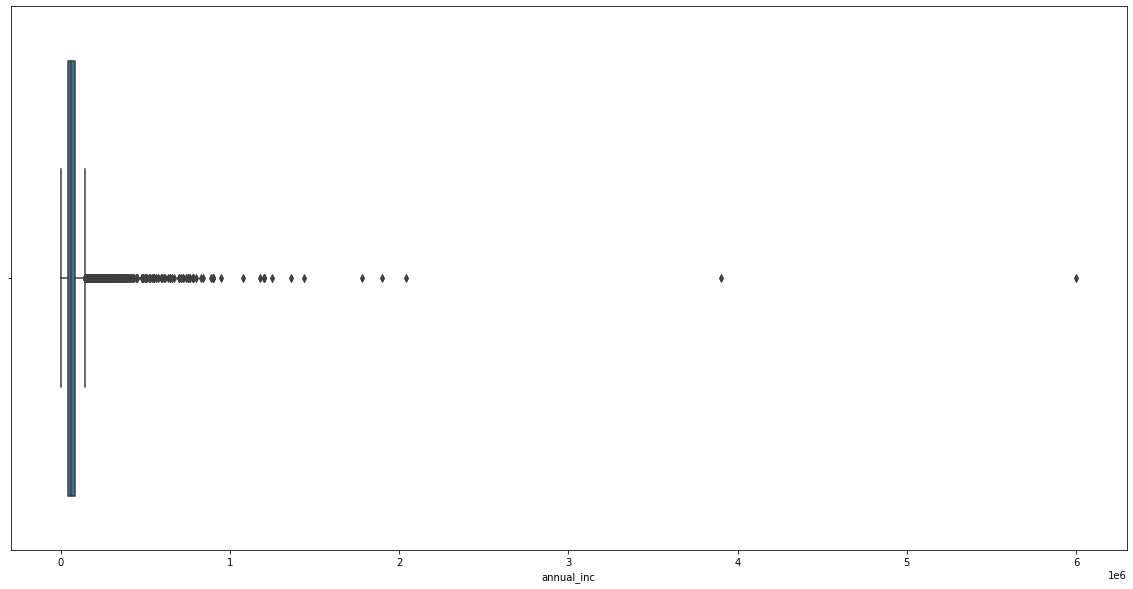

In [29]:

plt.figure(figsize=(20,10))
sns.boxplot(x=df["annual_inc"])
plt.show()

#### In annual_inc column we can see the presence of outliers. so we can remove those outliers using IQR
#### removeOutliers function retuns a lower_limit and upper limit.
#### The values which are outside of those limits will be treated as outliers

In [30]:
def removeOutliers(data, col):
    Q3 = np.quantile(data[col], 0.75)
    Q1 = np.quantile(data[col], 0.25)
    IQR = Q3 - Q1

    print("IQR value for column %s is: %s" % (col, IQR))
    
    lower_range = Q1 - 1.5 * IQR
    upper_range = Q3 + 1.5 * IQR
    
    return lower_range,upper_range

In [31]:
#shape of dataframe before dropping outliers
df.shape

(38527, 23)

In [32]:
#Execute removeOutliers function on annual_inc
LL,UL=removeOutliers(df,"annual_inc")
print('lower_limit  ',LL)
print('upper_limit   ',UL)

IQR value for column annual_inc is: 42000.0
lower_limit   -23000.0
upper_limit    145000.0


In [33]:
#we can see the lower limit of annula_inc is in negative value
#Here we can ignore lower_limit and filter data with upper limit otherwise zero cane be assigned as lower_limit
df = df[df["annual_inc"] < UL ]

In [34]:
#shape of dataframe after removing outliers in annual_inc
df.shape

(36705, 23)

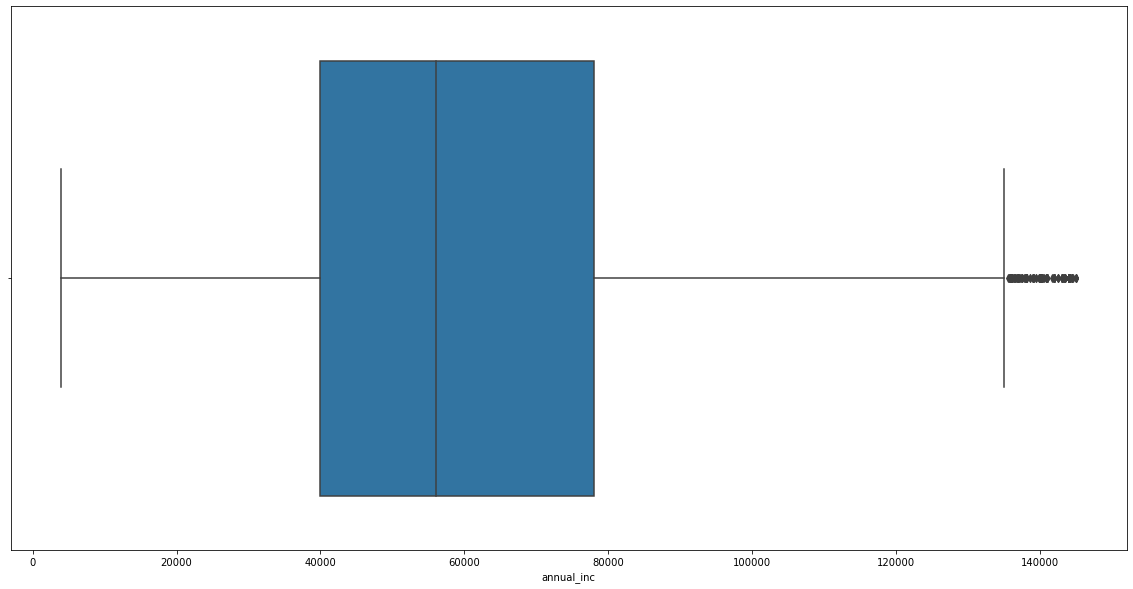

In [35]:
#plot after removing outliers
plt.figure(figsize=(20,10))
sns.boxplot(x = df["annual_inc"])
plt.show()

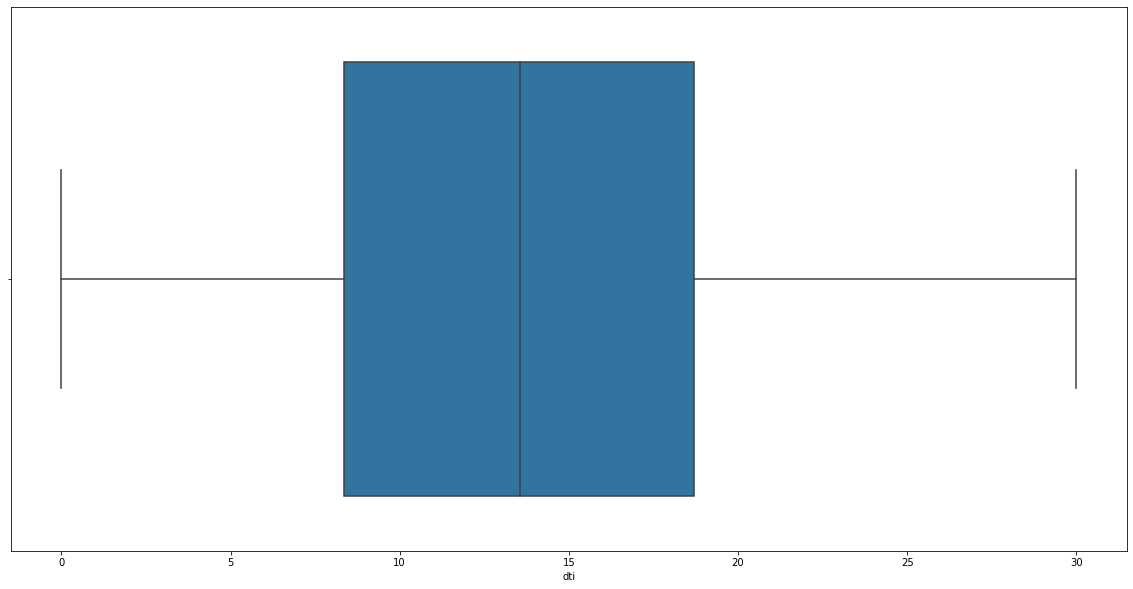

In [36]:
#boxplot of dti
plt.figure(figsize=(20,10))
sns.boxplot(x= df["dti"])
plt.show()

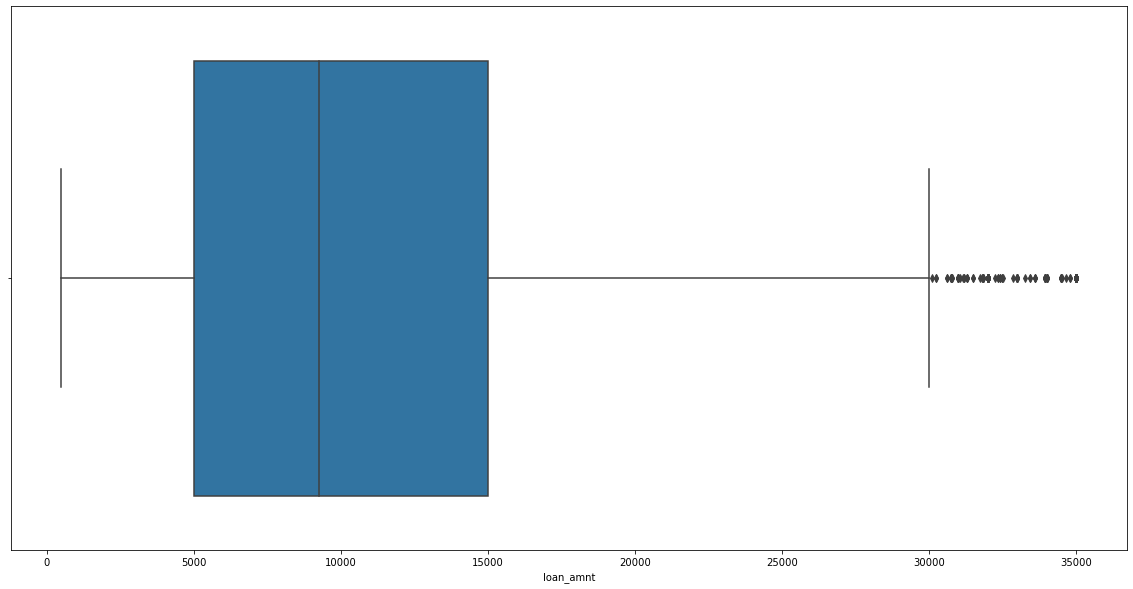

In [37]:
#boxplot of loan_amnt
plt.figure(figsize=(20,10))
sns.boxplot(x= df["loan_amnt"])
plt.show()

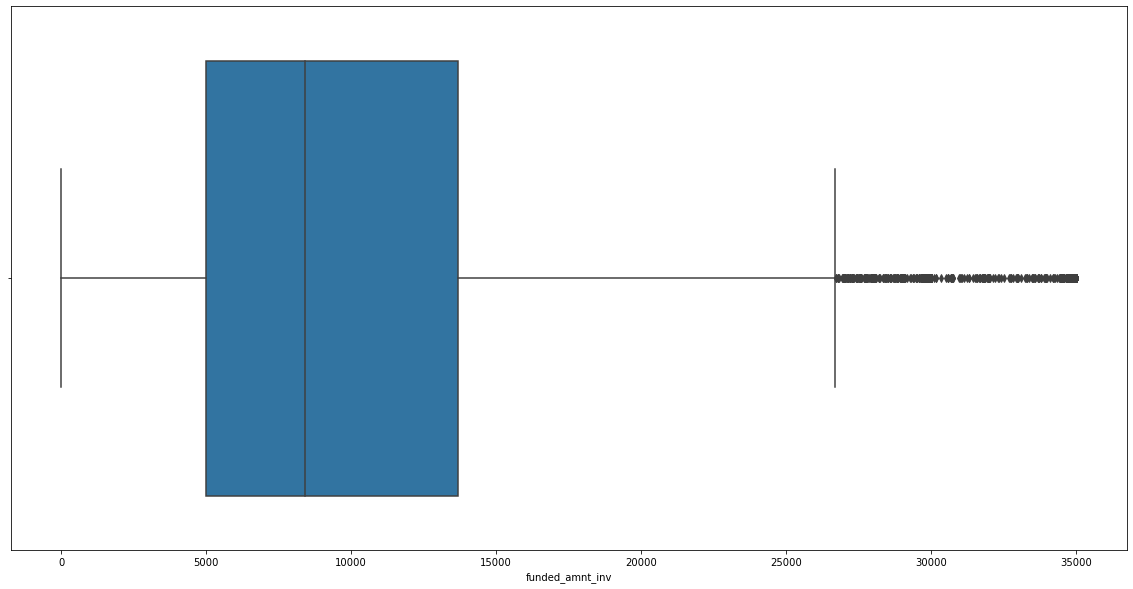

In [38]:
#boxplot of "funded_amnt_inv"
plt.figure(figsize=(20,10))
sns.boxplot(x = df["funded_amnt_inv"])
plt.show()

#### Visualizing loan status column 

Text(0.5, 1.0, 'Loan_status Distribution - Percentage')

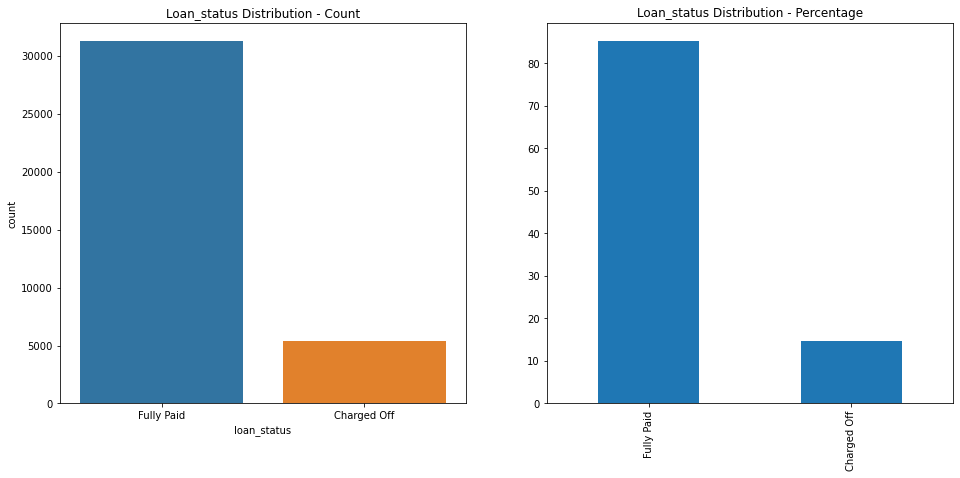

In [39]:
#visualizing loan status column 
plt.figure(figsize=(16,7))
plt.subplot(1, 2, 1)
sns.countplot(x=df['loan_status'])
plt.title('Loan_status Distribution - Count')

plt.subplot(1, 2, 2)
((df['loan_status'].value_counts()*100/len(df)).sort_values(ascending=False)).plot(kind='bar')
plt.title('Loan_status Distribution - Percentage')

In [40]:
#Checking Percentage of Loans Defaulted (Value 1) and Loans paid (Value 0)
round((df['loan_status'].value_counts()*100/len(df)).sort_values(ascending=False),2)

Fully Paid     85.25
Charged Off    14.75
Name: loan_status, dtype: float64

In [53]:
#Checking Count of Loans Defaulted (Value 1) and Loans paid (Value 0)
df['loan_status'].value_counts()

Fully Paid     31292
Charged Off     5413
Name: loan_status, dtype: int64

## Observation:  In the given data  14.75 % of Loans( 5413 loans) are Defaulted . 
    

###  2. Univariate Analysis 
#### Visualizing and analysing the categorical Data 


loan_status,Charged Off,Fully Paid,All
grade,,,
A,593,9084,9677
B,1379,9743,11122
C,1322,6161,7483
D,1080,3755,4835
E,657,1786,2443
F,288,595,883
G,94,168,262
All,5413,31292,36705


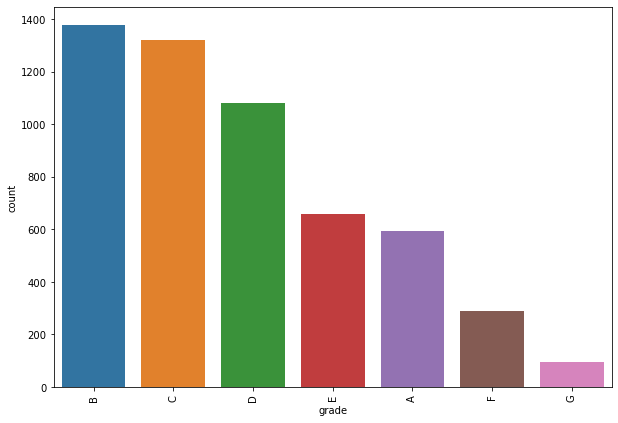

loan_status,Charged Off,Fully Paid,All
term,,,
36 months,3105,24647,27752
60 months,2308,6645,8953
All,5413,31292,36705


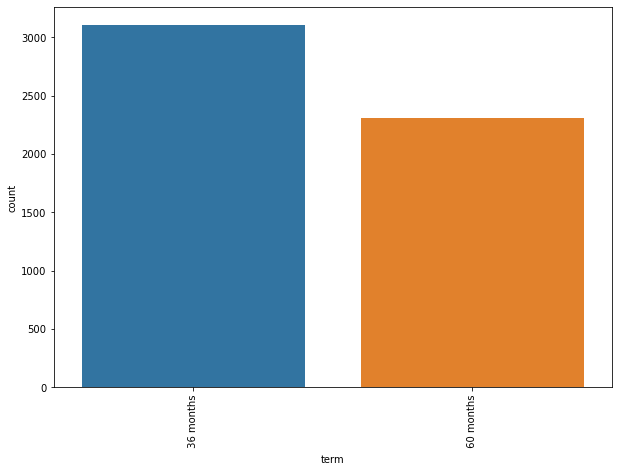

loan_status,Charged Off,Fully Paid,All
purpose,,,
car,158,1295,1453
credit_card,520,4270,4790
debt_consolidation,2678,14659,17337
educational,54,255,309
home_improvement,319,2249,2568
house,55,283,338
major_purchase,216,1832,2048
medical,103,536,639
moving,90,458,548


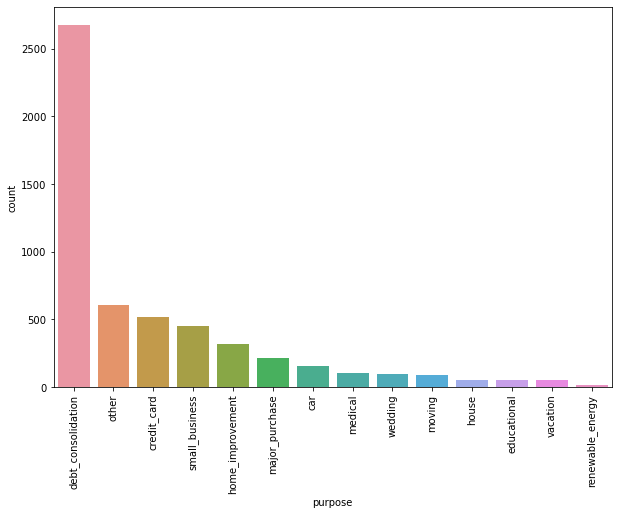

loan_status,Charged Off,Fully Paid,All
home_ownership,,,
MORTGAGE,2198,13542,15740
OTHER,17,77,94
OWN,434,2419,2853
RENT,2764,15254,18018
All,5413,31292,36705


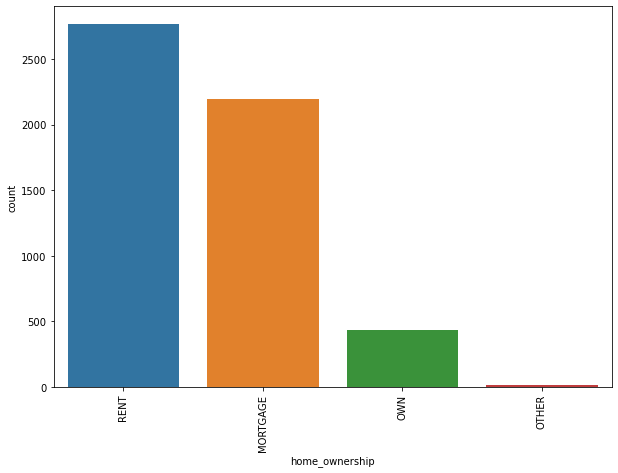

loan_status,Charged Off,Fully Paid,All
verification_status,,,
Not Verified,2091,14187,16278
Source Verified,1372,7796,9168
Verified,1950,9309,11259
All,5413,31292,36705


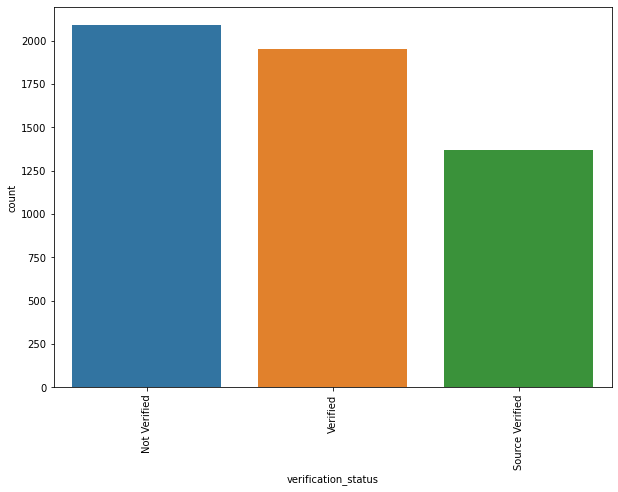

loan_status,Charged Off,Fully Paid,All
issue_month,,,
Apr,359,2355,2714
Aug,448,2770,3218
Dec,657,3370,4027
Feb,282,1973,2255
Jan,312,1955,2267
Jul,458,2744,3202
Jun,459,2552,3011
Mar,326,2225,2551
May,455,2342,2797


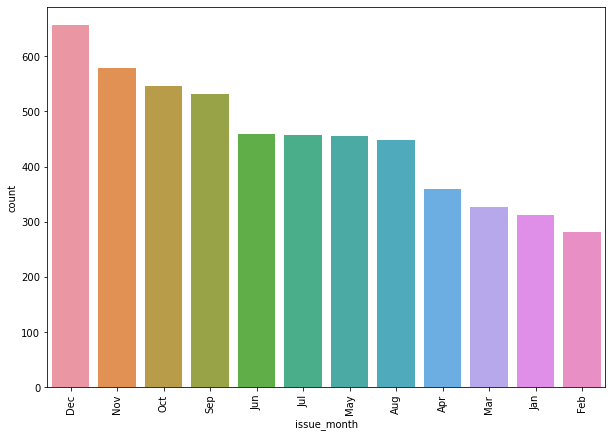

loan_status,Charged Off,Fully Paid,All
issue_year,,,
2007,41,189,230
2008,233,1251,1484
2009,564,3914,4478
2010,1427,9596,11023
2011,3148,16342,19490
All,5413,31292,36705


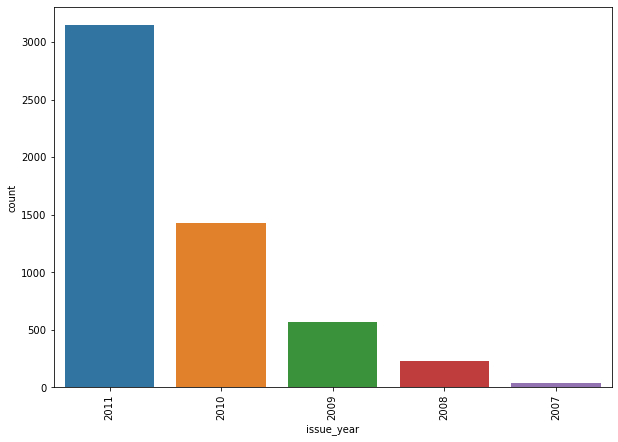

loan_status,Charged Off,Fully Paid,All
emp_length,,,
1 year,447,2599,3046
10+ years,1499,7435,8934
2 years,547,3560,4107
3 years,537,3291,3828
4 years,441,2759,3200
5 years,440,2607,3047
6 years,294,1781,2075
7 years,252,1391,1643
8 years,193,1152,1345


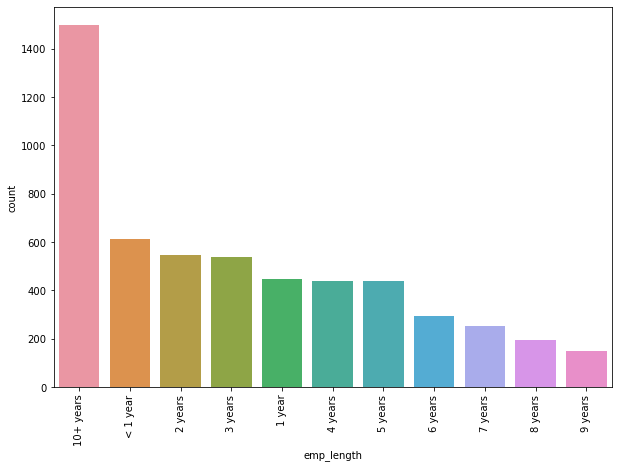

In [41]:
categorics=['grade','term','purpose','home_ownership','verification_status','issue_month','issue_year','emp_length']
for col in categorics:
    table=pd.crosstab(df[col],df['loan_status'],margins=True)
    display(table)
    plt.figure(figsize=(10,7))
    data=df[df.loan_status == 'Charged Off']
    sns.countplot(x=data[col],data = data,order=data[col].value_counts().index)
    plt.xticks(rotation=90)
    plt.show()
    
    

### Observations:
#### From The above analysis  There is a high chance of defaulting when the following apply loan : 

- People with Grade 'B' apply.
- Applications with tenure of '36 months'.
- People who took loan for 'debt_consolidation'.
- People having house_ownership as 'RENT'
- Applications with varification_status as 'Not verified'
- Applications submitted in the month of December and November.
- Applications submitted in the year of '2011'
- employees with '<1 year experience'( in graph employees with 10+year having higher count. This is because 10+ years will cover lot of applications people having experience in the range of 10-50 will also fall under this category.So we can assume <1 year experience having higher risk of defaulting)

#### Low chance of defaulting when : 
- People with Grade 'G' apply.
- Applications with tenure of '60 months'.
- People who took loan for 'renewable_energy','vacation','educational','house','wedding','moving'.
- People having house_ownership as 'OWN'.
- Applications with varification_status as 'Source verified'
- Applications submitted in the month of 'February'and 'January'
- Applications submitted in the year of '2007'
- Applications of Employees with '8-9 years experience'



#### Visualizing and analysing Continuous/Numeric variables
#### Creating bins for some numeric variables using pd.cut() 

In [54]:
#creating bins for annual income,loan_amnt,dti,int_rate
df['annual_inc_bins'] = pd.cut(df['annual_inc'], bins=[3000,31000,58000,85000,112000,140000])
df['loan_amnt_bins'] = pd.cut(df['loan_amnt'], bins=[500,7000,14000,21000,28000,35000])
df['dti_bins'] = pd.cut(df['dti'], bins=[0,6,12,18,24,30])
df['int_rate_bins'] = pd.cut(df['int_rate'],bins=[5,9,13,17,21,24])


In [43]:
df.head()

,loan_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_util,total_acc,issue_month,issue_year,annual_inc_bins,loan_amnt_bins,dti_bins,int_rate_bins
0,5000,4975.0,36 months,10.65,162.87,B,B2,10+ years,RENT,24000.0,...,3,0,83.7,9,Dec,2011,"(3000, 31000]","(500, 7000]","(24, 30]","(9, 13]"
1,2500,2500.0,60 months,15.27,59.83,C,C4,< 1 year,RENT,30000.0,...,3,0,9.4,4,Dec,2011,"(3000, 31000]","(500, 7000]","(0, 6]","(13, 17]"
2,2400,2400.0,36 months,15.96,84.33,C,C5,10+ years,RENT,12252.0,...,2,0,98.5,10,Dec,2011,"(3000, 31000]","(500, 7000]","(6, 12]","(13, 17]"
3,10000,10000.0,36 months,13.49,339.31,C,C1,10+ years,RENT,49200.0,...,10,0,21.0,37,Dec,2011,"(31000, 58000]","(7000, 14000]","(18, 24]","(13, 17]"
5,5000,5000.0,36 months,7.90,156.46,A,A4,3 years,RENT,36000.0,...,9,0,28.3,12,Dec,2011,"(31000, 58000]","(500, 7000]","(6, 12]","(5, 9]"


loan_status,Charged Off,Fully Paid,All
int_rate_bins,,,
"(5, 9]",575,8870,9445
"(9, 13]",1780,11746,13526
"(13, 17]",2038,8458,10496
"(17, 21]",886,2057,2943
"(21, 24]",132,160,292
All,5411,31291,36702


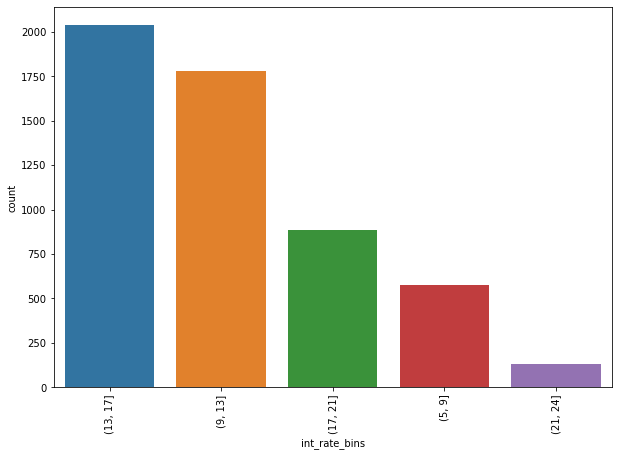

loan_status,Charged Off,Fully Paid,All
annual_inc_bins,,,
"(3000, 31000]",875,3860,4735
"(31000, 58000]",2281,12138,14419
"(58000, 85000]",1490,9273,10763
"(85000, 112000]",510,3960,4470
"(112000, 140000]",244,1963,2207
All,5400,31194,36594


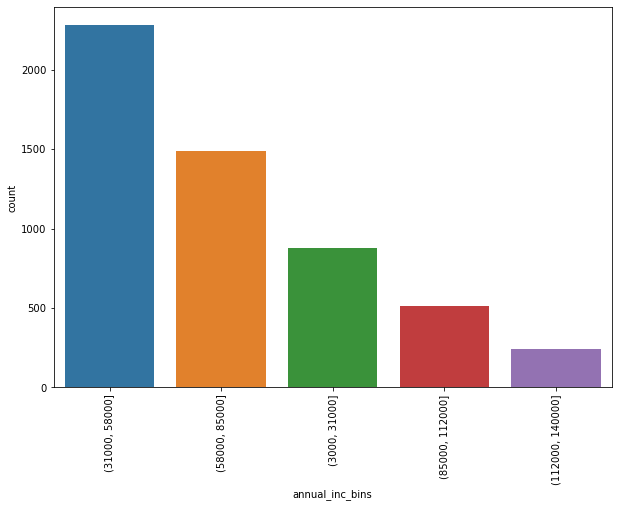

loan_status,Charged Off,Fully Paid,All
loan_amnt_bins,,,
"(500, 7000]",1854,12176,14030
"(7000, 14000]",1742,11091,12833
"(14000, 21000]",1109,5470,6579
"(21000, 28000]",484,1905,2389
"(28000, 35000]",224,645,869
All,5413,31287,36700


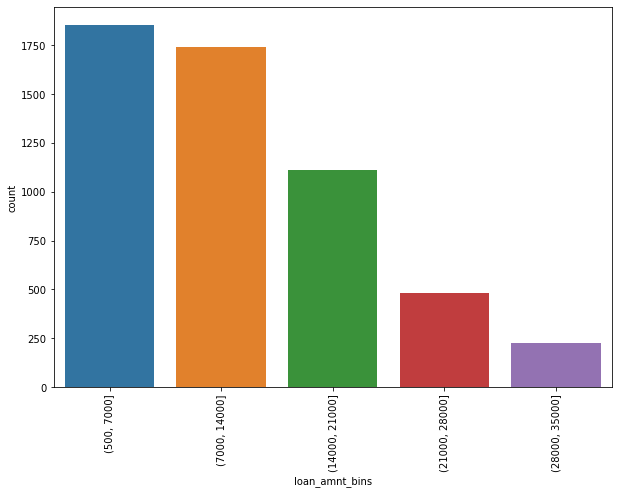

loan_status,Charged Off,Fully Paid,All
dti_bins,,,
"(0, 6]",701,5004,5705
"(6, 12]",1287,8271,9558
"(12, 18]",1669,9251,10920
"(18, 24]",1468,7240,8708
"(24, 30]",261,1390,1651
All,5386,31156,36542


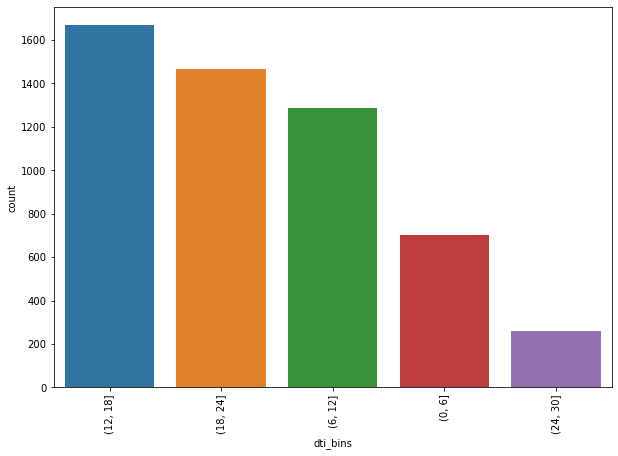

In [44]:
categorical_bins=['int_rate_bins','annual_inc_bins','loan_amnt_bins','dti_bins']
for col in categorical_bins:
    table=pd.crosstab(df[col],df['loan_status'],margins=True)
    display(table)
    plt.figure(figsize=(10,7))
    data=df[df.loan_status == 'Charged Off']
    sns.countplot(x=data[col],data = data,order=data[col].value_counts().index)
    plt.xticks(rotation=90)
    plt.show()
    
    

### Observations:
#### From The above analysis  There is a high chance of defaulting in case of : 

- Loans with interest rate of 13-17%
- Applicants who have an income of range 31000- 58000
- Loan amount in the range of 500 - 14000
- Dti is between 12-18

#### Low chance of defaulting when : 

- Applicants who have an income of range 112000- 140000
- Loan amount in the range of 28000 - 35000
- Dti is between 24-30


## Bivariate Analysis
### Analysing  Interest_rate vs Purpose

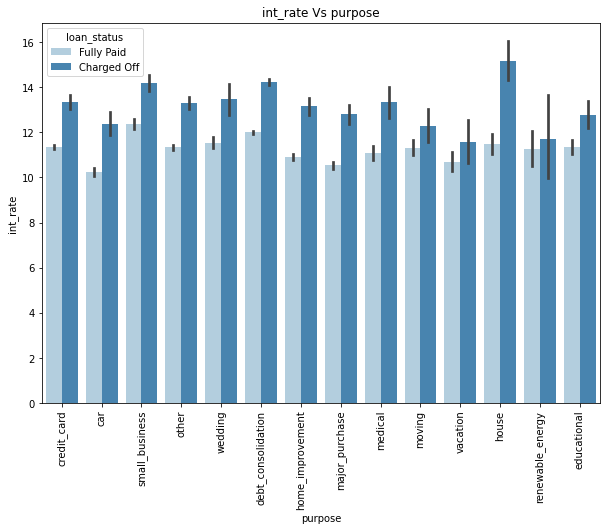

In [45]:
plt.figure(figsize=(10,7))
sns.barplot(data =df,x='purpose', y='int_rate', hue ='loan_status',palette="Blues")
plt.xticks(rotation=90)
plt.title('int_rate Vs purpose')
plt.show()

### Observations:
#### From The above analysis  There is a high chance of defaulting when : 
- People who took loan for house and having interest_rate between 14-16%
- People who took loan for debt_consolidation,small_business and having interest_rate between 12-14%


###  Analysing the Loan_amount vs interest_rate

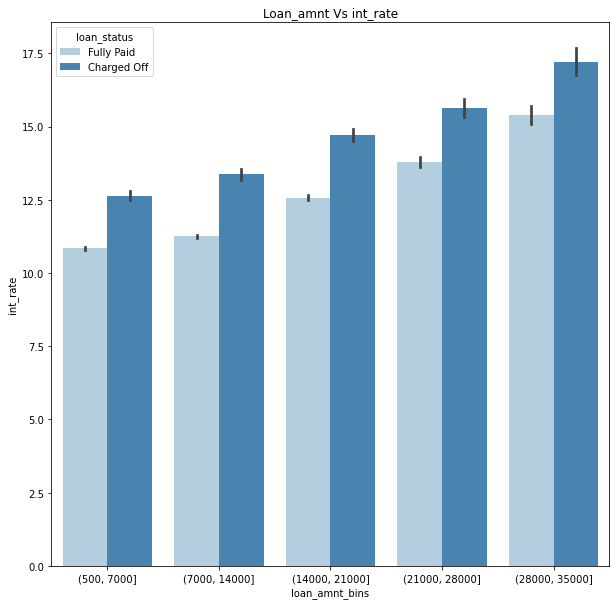

In [46]:
plt.figure(figsize=(10,10))
sns.barplot(data =df,x='loan_amnt_bins', y='int_rate', hue ='loan_status',palette="Blues")
plt.title('Loan_amnt Vs int_rate')
plt.show()

### Observations:
#### From The above analysis  There is a high chance of defaulting when : 
- Loan  amount in the range 28k - 35k and  interest rate at 15-17.5 %


### Analysing the Loan_amount vs Purpose

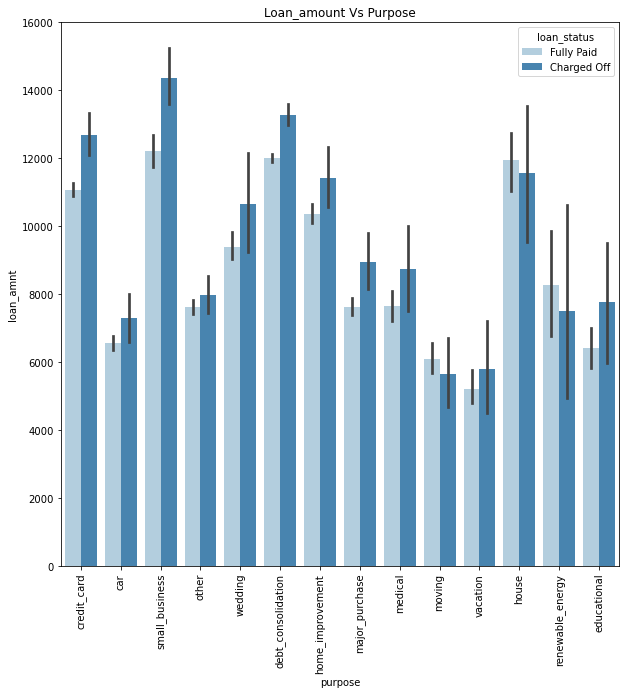

In [47]:
plt.figure(figsize=(10,10))
sns.barplot(data =df,x='purpose', y='loan_amnt', hue ='loan_status',palette="Blues")
plt.title('Loan_amount Vs Purpose')
plt.xticks(rotation=90)
plt.show()

### Observations:
#### From The above analysis  There is a high chance of defaulting when : 
- Loan for small business and the loan amount in between 14-16k
- Loan for debt_consolidation and the loan amount in between 12-14k


### Analysing the Annual income vs Interest rate

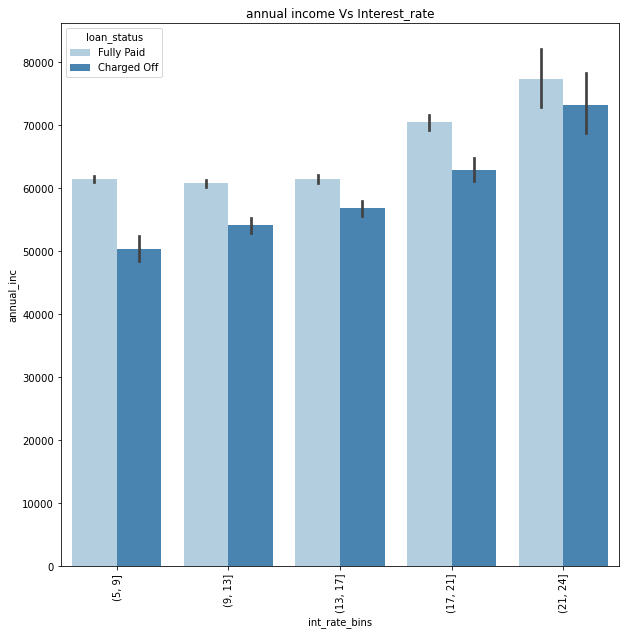

In [48]:
plt.figure(figsize=(10,10))
sns.barplot(data =df,x='int_rate_bins', y='annual_inc', hue ='loan_status',palette="Blues")
plt.title('annual income Vs Interest_rate')
plt.xticks(rotation=90)
plt.show()

### Observations:
#### From The above analysis  There is a high chance of defaulting when : 
- Having annual income between 70-80k and interest rate at 21-24%

### Analysing the loan_amount vs verification_status

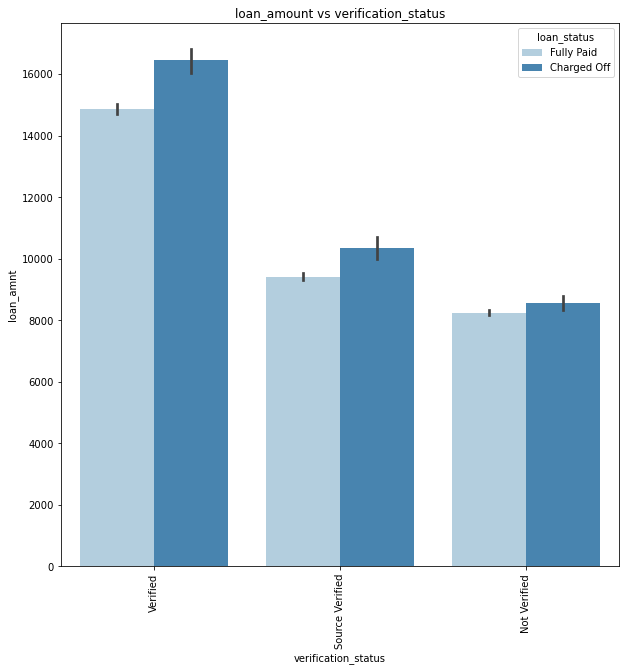

In [49]:
plt.figure(figsize=(10,10))
sns.barplot(data =df,x='verification_status', y='loan_amnt', hue ='loan_status',palette="Blues")
plt.title('loan_amount vs verification_status')
plt.xticks(rotation=90)
plt.show()

### Observations:
#### From The above analysis  There is a high chance of defaulting when : 
- loan status as verified and loan_amount between 14k - 16k plus

### Analysing the Loan_amount vs House_ownership

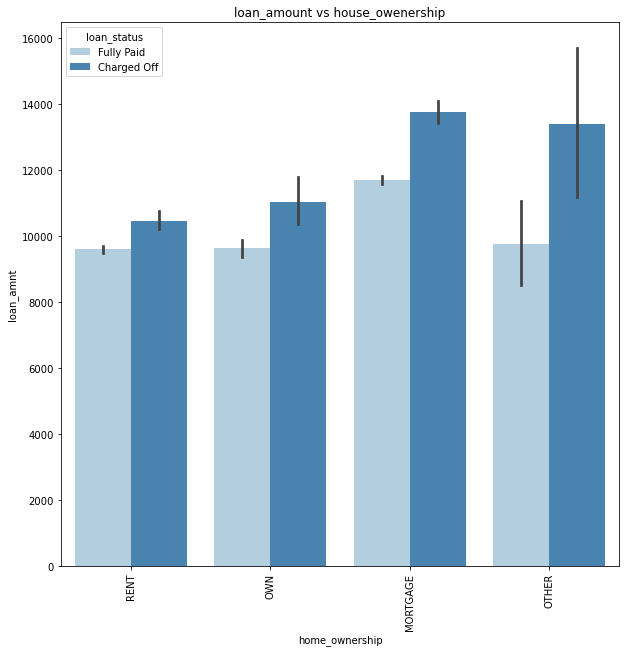

In [50]:
plt.figure(figsize=(10,10))
sns.barplot(data =df,x='home_ownership', y='loan_amnt', hue ='loan_status',palette="Blues")
plt.title('loan_amount vs house_owenership')
plt.xticks(rotation=90)
plt.show()

### Observations:
#### From The above analysis  There is a high chance of defaulting when : 
-  home ownership is 'MORTGAGE' and loan amount between 12-14k


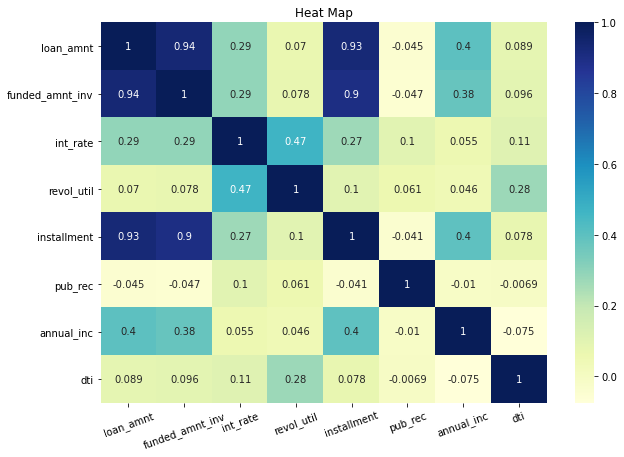

In [51]:
#Heat map numerical values in loan dataframe
corr_matirx = df[['loan_amnt','term','funded_amnt_inv','int_rate','revol_util','installment','pub_rec', 'annual_inc', 'dti', 'loan_status']].corr()
plt.figure(figsize = (10,7))
ax = sns.heatmap(corr_matirx, annot = True, cmap='YlGnBu')
plt.title('Heat Map')
plt.xticks(rotation=20)
plt.show()

#### Observation
From Above Heatmap we can see that Interest rate has a slight positive correlation with Default rate. Loan Amount, funded_amount and Amount_funded_inv have high correlation among themselves and also with installment which is expected. Income has positive correlation with Amount funded. Income also has slightly negative correlation with Default rate which would imply Higher Income groups would be less likely to default. DTI has negative correlation with Income, As Income increases DTI will decrease.


## Conclusion

The strong indicators of default are listed above. We suggest the Lending Club to utilize this analysis to assess and mitigate the risks and there by cutting down the overall credit loss.